In [60]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../processed_data/data.csv", index_col = 0)

In [61]:
place_name = "Yerevan, Armenia"
graph = ox.graph_from_place(place_name, network_type='walk')

In [62]:
# Extracting latitude and longitude data
latitudes = data['coordinates'].map(lambda x: ast.literal_eval(x)[0])
longitudes = data['coordinates'].map(lambda x: ast.literal_eval(x)[1])


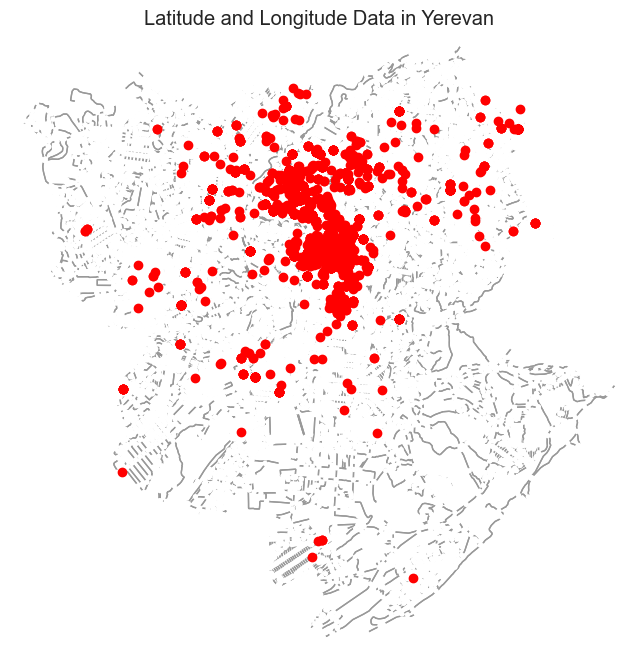

In [66]:
fig, ax = ox.plot_graph(graph, show=False, close=False)
plt.title('Latitude and Longitude Data in Yerevan')
plt.axis('off')
ax.scatter(longitudes, latitudes, c='red', zorder=2)
plt.savefig("../visualizations/Map points.png", dpi=600)
plt.show()

In [67]:
prices = data["price"]

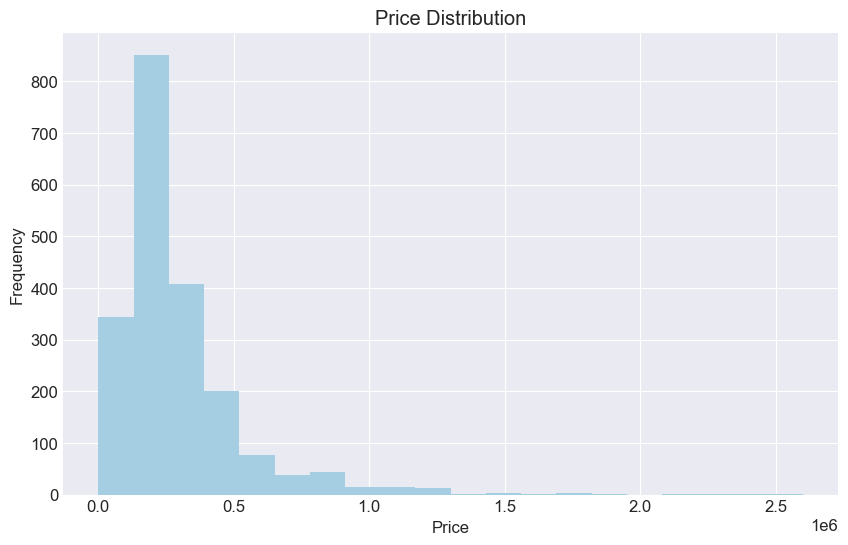

In [68]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas Series named 'prices'
data["price"].hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.savefig("../visualizations/Price Distribution.png", dpi=600)
plt.show()


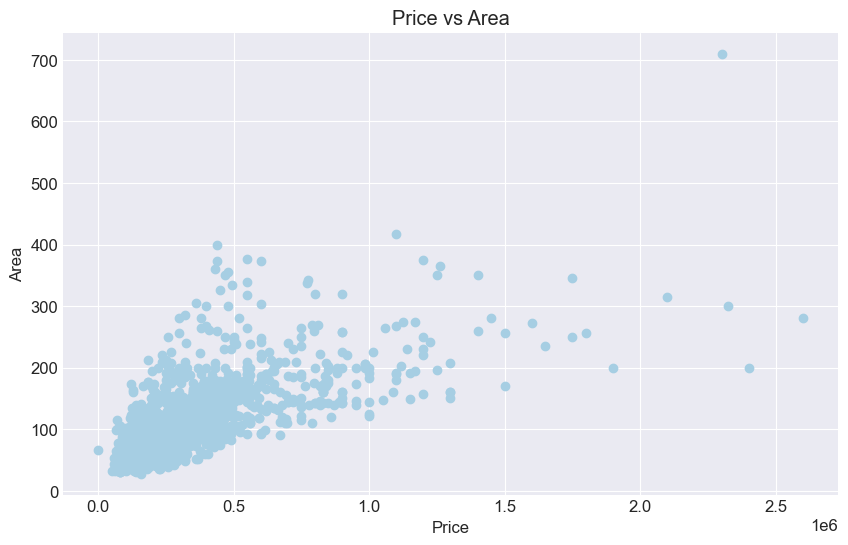

In [69]:
plt.scatter(data["price"], data["area"])
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Price vs Area')
plt.savefig("../visualizations/Price vs Area.png", dpi=600)
plt.show()

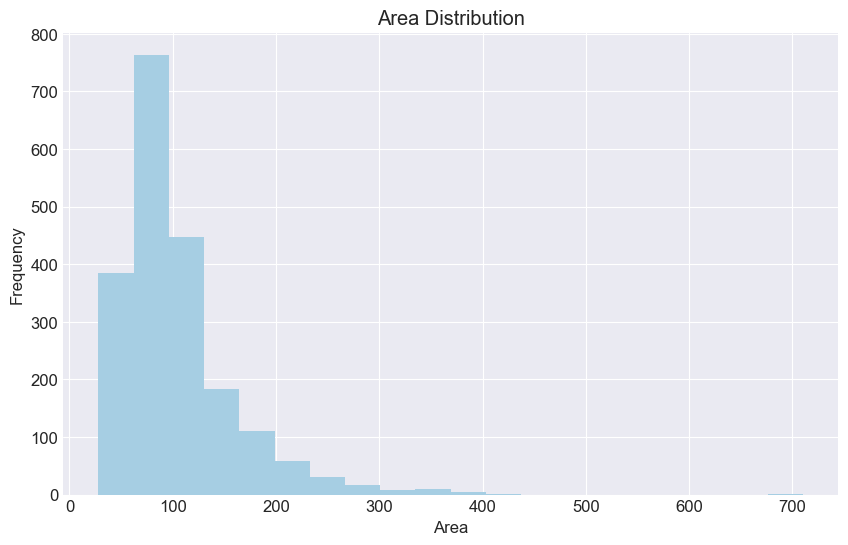

In [51]:
import matplotlib.pyplot as plt

# Assuming you have a Pandas Series named 'prices'
data["area"].hist(bins=20)  # You can adjust the number of bins as needed
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Area Distribution')
plt.show()


In [127]:
data["area"].describe()

count    2020.000000
mean      103.805470
std        56.012168
min        28.000000
25%        68.000000
50%        90.000000
75%       122.000000
max       710.250000
Name: area, dtype: float64

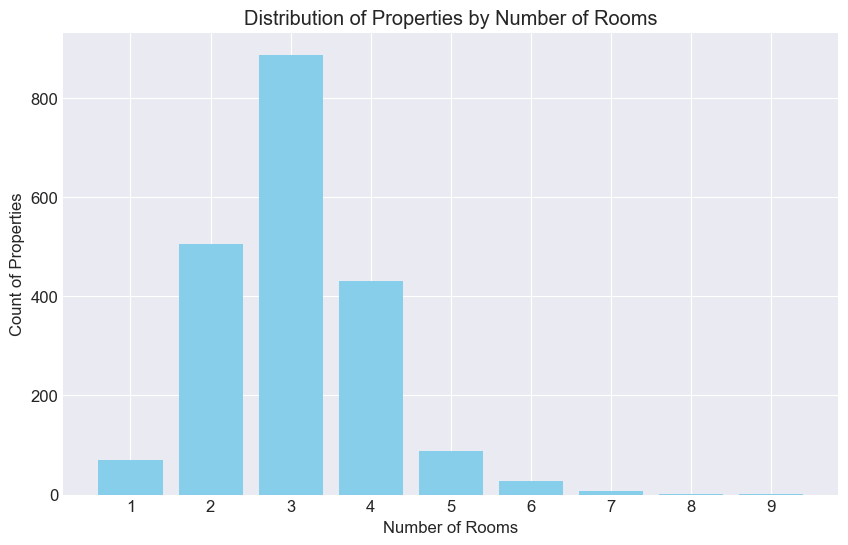

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Applying some matplotlib configurations for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid')  # Using seaborn style for better aesthetics
sns.set_palette("Paired")  # Setting a color palette
plt.rcParams['figure.figsize'] = [10, 6]  # Setting a default figure size
plt.rcParams['font.size'] = 12  # Setting a default font size

# Count of Properties by Number of Rooms
room_count = data['rooms'].value_counts().sort_index()
plt.bar(room_count.index, room_count.values, color='skyblue')
plt.xlabel('Number of Rooms')
plt.ylabel('Count of Properties')
plt.title('Distribution of Properties by Number of Rooms')
plt.xticks(room_count.index)  # Ensure all room counts are shown

# Show the plot
plt.savefig("../visualizations/Distribution of Properties by Number of Room.png", dpi=600)
plt.show()


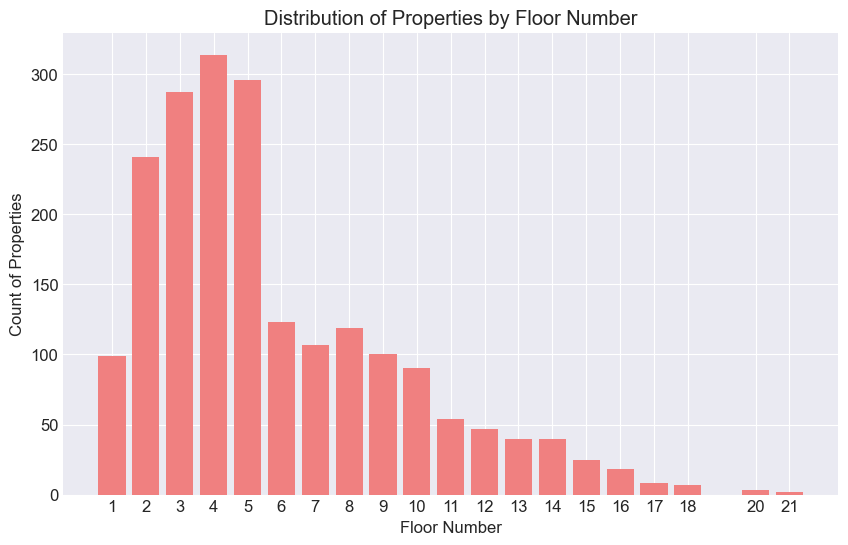

In [33]:
# Floor-wise Distribution of Properties
floor_count = data['floor'].value_counts().sort_index()
plt.bar(floor_count.index, floor_count.values, color='lightcoral')
plt.xlabel('Floor Number')
plt.ylabel('Count of Properties')
plt.title('Distribution of Properties by Floor Number')
plt.xticks(floor_count.index)  # Ensure all floor numbers are shown

# Show the plot
plt.savefig("../visualizations/Distribution by Properties by Floor Number.png", dpi=600)
plt.show()


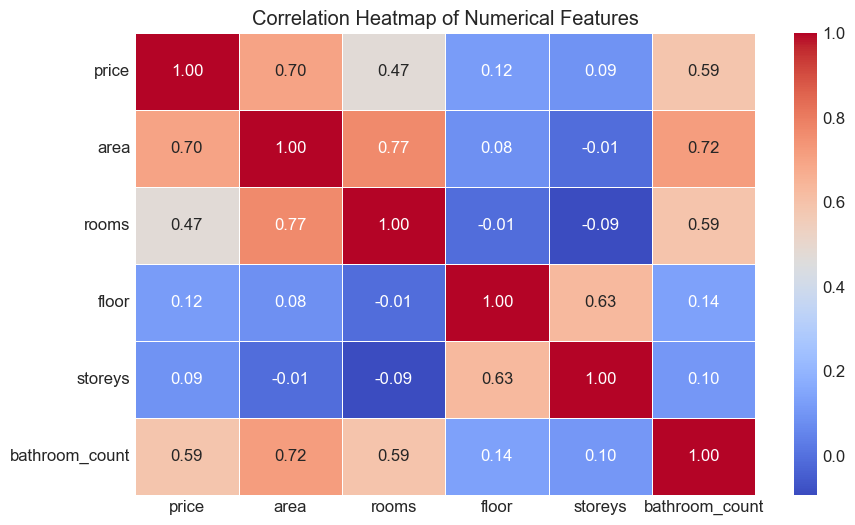

In [32]:
# Selecting numerical columns for the correlation heatmap
numerical_cols = ['price', 'area', 'rooms', 'floor', 'storeys', 'bathroom_count']
numerical_data = data[numerical_cols]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig("../visualizations/acorrelation_heatmap_numerical_features.png", dpi=600)
# Show the plot
plt.show()


In [23]:
import folium
from folium.plugins import MarkerCluster
import ast

# Checking for columns that might represent geographical coordinates
geo_columns = [col for col in data.columns if 'lat' in col.lower() or 'lon' in col.lower() or 'latitude' in col.lower() or 'longitude' in col.lower()]
geo_columns

# Creating a base map
map_center = [latitudes.mean(), longitudes.mean()]
map = folium.Map(location=map_center, zoom_start=12)

# Adding markers to the map using MarkerCluster for better performance and interactivity
marker_cluster = MarkerCluster().add_to(map)
for lat, lon in zip(latitudes, longitudes):
    folium.Marker(location=[lat, lon]).add_to(marker_cluster)

# Since we cannot directly display a Folium map in this environment, we'll save it to an HTML file and provide a link
map_file_path = '../visualizations/property_locations_map.html'
map.save(map_file_path)
map_file_path


'../visualizations/property_locations_map.html'

In [24]:
from folium.plugins import HeatMap

# Creating a new map centered on the properties
map_heat = folium.Map(location=map_center, zoom_start=12)

# Preparing data for the heatmap (latitude, longitude, and a weight based on price)
heat_data = [[lat, lon, price] for lat, lon, price in zip(latitudes, longitudes, data['price'])]

# Adding the HeatMap layer to the map
HeatMap(heat_data, radius=15, max_zoom=13).add_to(map_heat)

# Saving the heatmap to an HTML file
heatmap_file_path = '../visualizations/property_price_heatmap.html'
map_heat.save(heatmap_file_path)
heatmap_file_path

'../visualizations/property_price_heatmap.html'

In [26]:
# Creating a new map for the bubble visualization
map_bubble = folium.Map(location=map_center, zoom_start=12)

# Normalizing price data for bubble size
max_price = data['price'].max()
min_price = data['price'].min()
price_range = max_price - min_price

# Function to calculate bubble size
def calculate_bubble_size(price):
    # Simple normalization to get a size factor between 1 and 10
    return 1 + 9 * ((price - min_price) / price_range)

# Adding bubbles to the map
for lat, lon, price in zip(latitudes, longitudes, data['price']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=calculate_bubble_size(price),
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_bubble)

# Saving the bubble map to an HTML file
bubble_map_file_path = '../visualizations/property_price_bubble_map.html'
map_bubble.save(bubble_map_file_path)
bubble_map_file_path


'../visualizations/property_price_bubble_map.html'

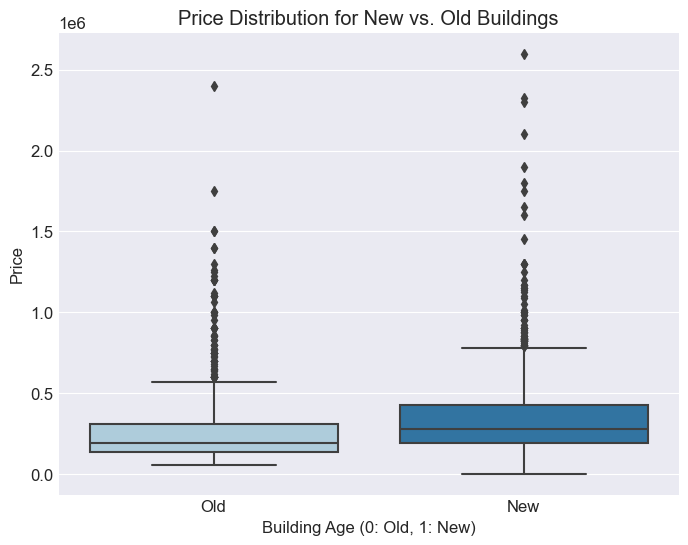

In [35]:
# Price Distribution by Building Age (new_building column)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['new_building'], y=data['price'])
plt.title('Price Distribution for New vs. Old Buildings')
plt.xlabel('Building Age (0: Old, 1: New)')
plt.ylabel('Price')
plt.xticks([0, 1], ['Old', 'New'])

# Show the plot
plt.savefig("../visualizations/Price Distribution for New vs. Old Buildings.png", dpi=600)
plt.show()


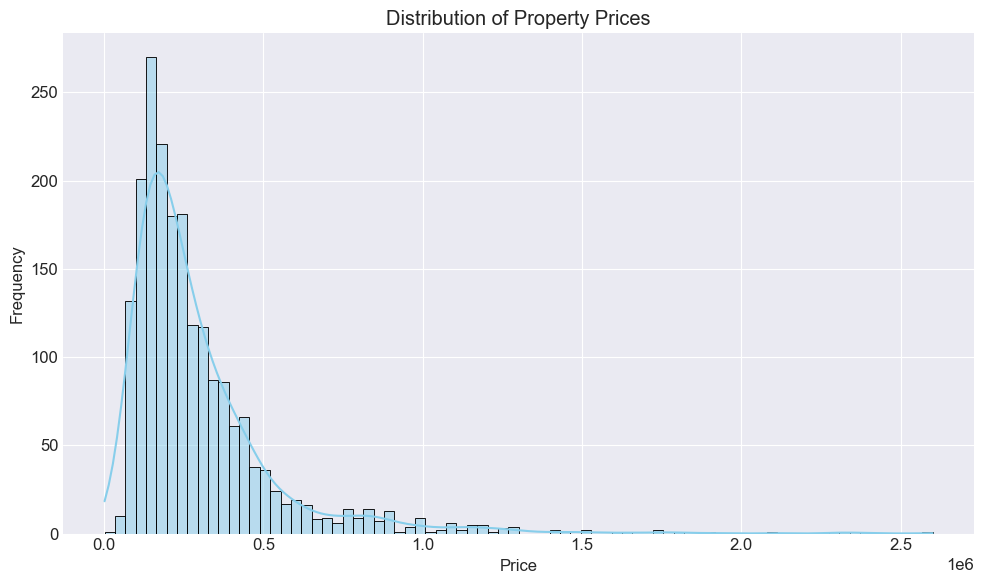

In [38]:
# Distribution plots for Prices and Areas
sns.histplot(data['price'], kde=True, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Area Distribution
# sns.histplot(data['area'], kde=True, color='salmon')
# plt.title('Distribution of Property Areas')
# plt.xlabel('Area (sq meters)')
# plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
